# Playing with the visits table 

### Alex Lu | End Autumn Q 17-18  
---

December 1, 2018

**OBJECTIVE**

---

I have been tasked with getting distributions of age, sex, for Arbor and PFC patients over the last year. This notebook examines the age and sex distributions from a visits paradigm (and not a unique'd patients paradigm). 

First, let's import all of the stuff that we'll need

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from utils.indicator import *
from utils.file_ops import *
from datetime import datetime
%matplotlib inline

We want to filter on the time of visit for longitudinal visualization. First, we should do a conversion on the format of the time string to make it more workable. Then, we're going to make this new 'ts' column the index, and drop the string form VisitDate series. 

In [35]:
def time_filter(t1, t2, df):
    # accepts numerical tuples of form (year, mon, day)
    bound1 = datetime(*t1)
    bound2 = datetime(*t2)
    print datetime(*t1), datetime(*t2)
    return df[bound1:bound2]

In [6]:
path_visits = "visits_data/both_clinics_2018_q4_v2.csv"
df_visits = pd.read_csv(path_visits, error_bad_lines=False, header=0)
df_visits.groupby(df_visits['PatientNumber']).size().describe()

count    722.000000
mean       2.512465
std        1.858514
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       19.000000
dtype: float64

In [7]:
df_visits['PatientNumber'].describe()

count         1814
unique         722
top       N0067052
freq            19
Name: PatientNumber, dtype: object

In [8]:
df_visits['VisitDateTimeTS'] = pd.to_datetime((df_visits['VisitDateTime']))
df_visits['DateFirstKnownTS'] = pd.to_datetime((df_visits['DateFirstKnown']))
df_visits.index = df_visits['VisitDateTimeTS']
#df_visits = df_visits.iloc[::-1]
del df_visits['DateFirstKnown']
del df_visits['VisitDateTime']

df_visits = df_visits[df_visits['LocationAbbreviation'] != 'TEST']
arbor_general_visits = df_visits[df_visits['VisitType'] == 'ARBOR GENERAL VISIT']
pfc_general_visits = df_visits[df_visits['VisitType'] == 'PFC NEW PATIENT VISIT']

print arbor_general_visits.describe()
print pfc_general_visits.describe()

        Age(Year)
count  414.000000
mean    48.253623
std     16.958886
min     18.000000
25%     33.000000
50%     49.000000
75%     63.000000
max     81.000000
        Age(Year)
count  275.000000
mean    49.112727
std     18.099432
min      4.000000
25%     32.000000
50%     52.000000
75%     63.000000
max     89.000000


In [9]:
arbor_general_visits.head(5)

,LocationAbbreviation,PatientNumber,Age(Year),VisitType,Sex,VisitDateTimeTS,DateFirstKnownTS
VisitDateTimeTS,,,,,,,
2018-03-04 09:30:00,AFC,N0065560,54,ARBOR GENERAL VISIT,M,2018-03-04 09:30:00,2018-03-04 08:45:51
2018-03-04 09:45:00,AFC,N0031241,64,ARBOR GENERAL VISIT,M,2018-03-04 09:45:00,2013-09-01 08:54:11
2018-03-04 10:00:00,AFC,N0063560,47,ARBOR GENERAL VISIT,U,2018-03-04 10:00:00,2017-10-15 09:00:00
2018-03-04 10:15:00,AFC,N0063513,47,ARBOR GENERAL VISIT,M,2018-03-04 10:15:00,2017-10-15 08:32:31
2018-03-04 10:30:00,AFC,N0065578,58,ARBOR GENERAL VISIT,M,2018-03-04 10:30:00,2018-03-04 09:48:10


Let's take a look and make sure we're looking at the right stuff

In [10]:
def temporal_distribution(df, ts_name = 'ts'):
    '''

    '''
    time_gb = df.groupby(df[ts_name].dt.month)
    plt.figure()
    time_gb.plot()
    plt.show()


In [11]:
arbor_general_visits['Sex'].value_counts(normalize=True)

F    0.437198
M    0.427536
U    0.135266
Name: Sex, dtype: float64

In [12]:
pfc_general_visits['Sex'].value_counts(normalize=True)

F    0.541818
M    0.400000
U    0.058182
Name: Sex, dtype: float64

In [13]:
arbor_general_visits['Age(Year)'].value_counts(bins=10)

(62.1, 68.4]      63
(55.8, 62.1]      56
(30.6, 36.9]      44
(17.936, 24.3]    43
(43.2, 49.5]      42
(49.5, 55.8]      41
(36.9, 43.2]      40
(24.3, 30.6]      39
(68.4, 74.7]      31
(74.7, 81.0]      15
Name: Age(Year), dtype: int64

In [14]:
pfc_general_visits['Age(Year)'].value_counts(bins=10)

(55.0, 63.5]     51
(21.0, 29.5]     51
(46.5, 55.0]     45
(63.5, 72.0]     39
(29.5, 38.0]     32
(72.0, 80.5]     22
(38.0, 46.5]     19
(12.5, 21.0]      9
(80.5, 89.0]      5
(3.914, 12.5]     2
Name: Age(Year), dtype: int64

In [15]:
pfc_general_visits[pfc_general_visits['Age(Year)'] < 18]

,LocationAbbreviation,PatientNumber,Age(Year),VisitType,Sex,VisitDateTimeTS,DateFirstKnownTS
VisitDateTimeTS,,,,,,,
2018-05-23 09:30:00,PFC,N0039583,4,PFC NEW PATIENT VISIT,U,2018-05-23 09:30:00,2014-06-29 11:51:57
2018-07-05 10:00:00,PFC,N0041335,4,PFC NEW PATIENT VISIT,F,2018-07-05 10:00:00,2014-08-24 19:51:32


In [16]:
arbor_visits_clean = arbor_general_visits[arbor_general_visits['Age(Year)'] > 18]
pfc_visits_clean = pfc_general_visits[pfc_general_visits['Age(Year)'] > 18]

In [17]:
arbor_visits_clean['Sex'].value_counts()

F    180
M    176
U     56
Name: Sex, dtype: int64

In [18]:
pfc_visits_clean['Sex'].value_counts()

F    148
M    109
U     15
Name: Sex, dtype: int64

In [19]:
arbor_visits_clean['Age(Year)'].value_counts(sort=False,bins=10)

(18.936999999999998, 25.2]    51
(25.2, 31.4]                  41
(31.4, 37.6]                  35
(37.6, 43.8]                  37
(43.8, 50.0]                  52
(50.0, 56.2]                  38
(56.2, 62.4]                  49
(62.4, 68.6]                  63
(68.6, 74.8]                  31
(74.8, 81.0]                  15
Name: Age(Year), dtype: int64

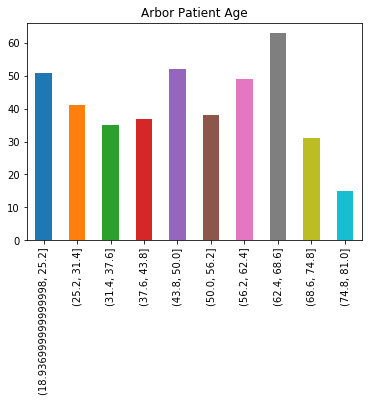

In [20]:
arbor_visits_clean['Age(Year)'].value_counts(sort=False,bins=10).plot(kind='bar', title='Arbor Patient Age')

In [21]:
pfc_visits_clean['Age(Year)'].value_counts(sort=False,bins=10)

(18.929, 26.0]    42
(26.0, 33.0]      29
(33.0, 40.0]      22
(40.0, 47.0]      23
(47.0, 54.0]      34
(54.0, 61.0]      36
(61.0, 68.0]      49
(68.0, 75.0]      21
(75.0, 82.0]      12
(82.0, 89.0]       4
Name: Age(Year), dtype: int64

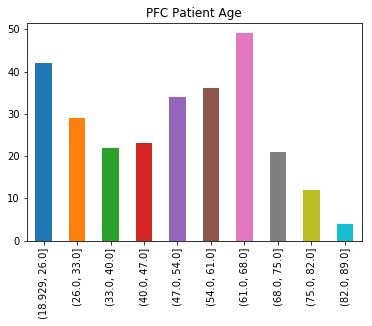

In [22]:
pfc_visits_clean['Age(Year)'].value_counts(sort=False,bins=10).plot(kind='bar', title='PFC Patient Age')

In [23]:
arbor_visits_clean['Age(Year)'].describe()

count    412.000000
mean      48.400485
std       16.867951
min       19.000000
25%       33.000000
50%       49.500000
75%       63.000000
max       81.000000
Name: Age(Year), dtype: float64

In [24]:
pfc_visits_clean['Age(Year)'].describe()

count    272.000000
mean      49.558824
std       17.675536
min       19.000000
25%       32.750000
50%       53.000000
75%       63.000000
max       89.000000
Name: Age(Year), dtype: float64

In [25]:
arbor_visits_clean['PatientNumber'].describe()

count          412
unique         358
top       N0059372
freq             5
Name: PatientNumber, dtype: object

In [26]:
pfc_visits_clean['PatientNumber'].describe()

count          272
unique         265
top       N0067084
freq             2
Name: PatientNumber, dtype: object

In [27]:
arbor_visits_clean.groupby(arbor_visits_clean['PatientNumber']).size().describe()

count    358.000000
mean       1.150838
std        0.454836
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        5.000000
dtype: float64

In [28]:
pfc_visits_clean.groupby(pfc_visits_clean['PatientNumber']).size().describe()

count    265.000000
mean       1.026415
std        0.160670
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
dtype: float64

In [29]:
def get_grouped_data(df, column, group_keys=None, summed=True):
    grouped = df.groupby(df[column])
    visits_per_group = [] if group_keys is None else np.zeros(len(group_keys))
    if group_keys is not None:
        for c, group in enumerate(group_keys):
            if group in grouped.groups:
                visits_per_group[c] = len(grouped.groups[group])
    else:
        for group in grouped.groups:
            visits_per_group.append(len(grouped.groups[group]))
        
    if summed:
        return np.sum(visits_per_group)
    else:
        return visits_per_group

In [36]:
def visits_periodic(df, period='mom', group_keys=None):
    
    periodic_visits = []
    time_points = []
    spec_usage_mom = []
    
    if period == 'mom':
        months = [val for val in range(7, 13)]
        years = [2018]
        for year in years:
            for begin_month in months:
                tp1 = (year, begin_month, 1)
                tp2 = ()
                if begin_month == 12:
                    tp2 = (year+1, 1, 1)
                else:
                    tp2 = (year, begin_month+1, 1)
                    
                print tp1, tp2
                filtered = time_filter(tp1,tp2, df)
                
                if filtered.values.shape[0] == 0:
                    continue
                else:
                    periodic_visits.append(get_grouped_data(filtered, 'PatientNumber'))
                    spec_usage_mom.append(get_grouped_data(filtered, 'VisitType', group_keys = group_keys, summed=False))
                    time_points.append(str(begin_month) + '/' + str(year))
                    

    return (periodic_visits, np.array(spec_usage_mom), time_points)

In [39]:
print arbor_visits_clean.index


DatetimeIndex(['2018-03-04 09:30:00', '2018-03-04 09:45:00',
               '2018-03-04 10:00:00', '2018-03-04 10:15:00',
               '2018-03-04 10:30:00', '2018-03-04 10:45:00',
               '2018-03-04 11:30:00', '2018-03-04 11:30:00',
               '2018-03-04 11:30:00', '2018-03-11 09:15:00',
               ...
               '2018-07-08 10:30:00', '2018-07-08 10:45:00',
               '2018-07-08 11:00:00', '2018-07-08 11:15:00',
               '2018-07-08 11:45:00', '2018-07-08 12:00:00',
               '2018-07-08 13:00:00', '2018-07-22 08:45:00',
               '2018-09-09 10:00:00', '2018-09-09 12:45:00'],
              dtype='datetime64[ns]', name=u'VisitDateTimeTS', length=412, freq=None)


In [37]:
arbor_spec_clinics = [
    'ARBOR CARDIOLOGY',
    'ARBOR DERMATOLOGY',
    'ARBOR FOLLOW-UP VISIT',
    'ARBOR GENERAL VISIT',
    'ARBOR MENTAL HEALTH',
    'ARBOR MSK',
    'ARBOR NEUROLOGY',
    'ARBOR OPHTHALMOLOGY',
    "ARBOR WOMEN'S HEALTH",
    'LAB FOLLOW-UP NOTE'
    ]


periodic_visits, spec_usage_mom, time_points = visits_periodic(arbor_visits_clean, 
                                                               group_keys=arbor_spec_clinics)
print np.sum(periodic_visits)
print spec_usage_mom
print time_points

arbor_specialty_clinics_df = pd.DataFrame({clinic:spec_usage_mom[:,col_idx] 
                                     for clinic, col_idx in zip(arbor_spec_clinics, range(spec_usage_mom.shape[1]))
                                    }, 
                                    index = time_points)

arbor_specialty_clinics_df.head(12)


(2018, 7, 1) (2018, 8, 1)
2018-07-01 00:00:00 2018-08-01 00:00:00


KeyError: 1530403200000000000

(0, 18)

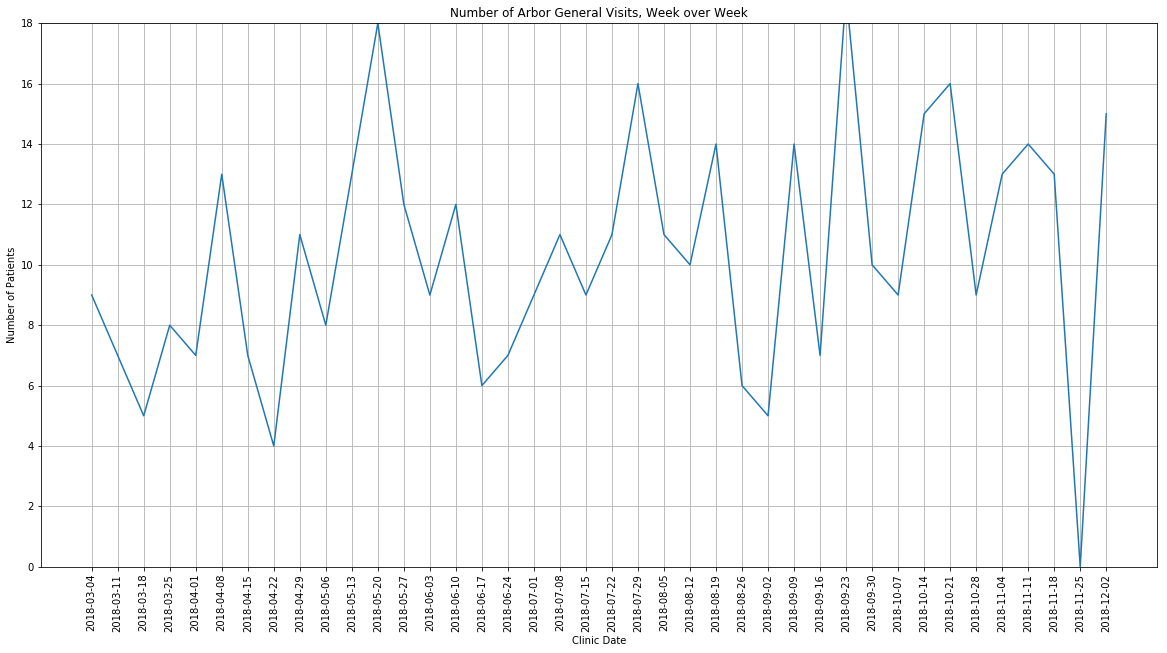

In [40]:
arbor_date_grouped = arbor_visits_clean.groupby(pd.Grouper(key='VisitDateTimeTS', freq='W-SUN'))
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(arbor_date_grouped['PatientNumber'].count().index.strftime('%Y-%m-%d'), arbor_date_grouped['PatientNumber'].count().values)
plt.xticks(rotation=90)
ax.grid(True)
plt.title('Number of Arbor General Visits, Week over Week')
plt.xlabel('Clinic Date')
plt.ylabel('Number of Patients')
plt.ylim([0, 18])

(0, 18)

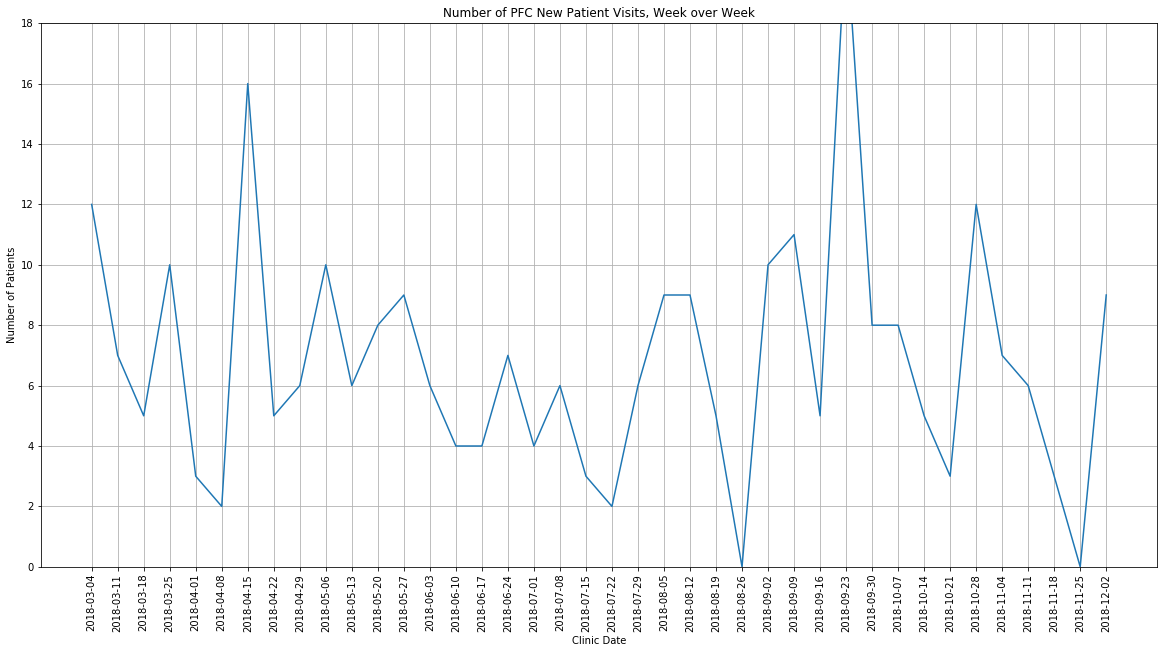

In [41]:
pfc_date_grouped = pfc_visits_clean.groupby(pd.Grouper(key='VisitDateTimeTS', freq='W-SUN'))
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(pfc_date_grouped['PatientNumber'].count().index.strftime('%Y-%m-%d'), pfc_date_grouped['PatientNumber'].count().values)
plt.xticks(rotation=90)
ax.grid(True)
plt.title('Number of PFC New Patient Visits, Week over Week')
plt.xlabel('Clinic Date')
plt.ylabel('Number of Patients')
plt.ylim([0, 18])

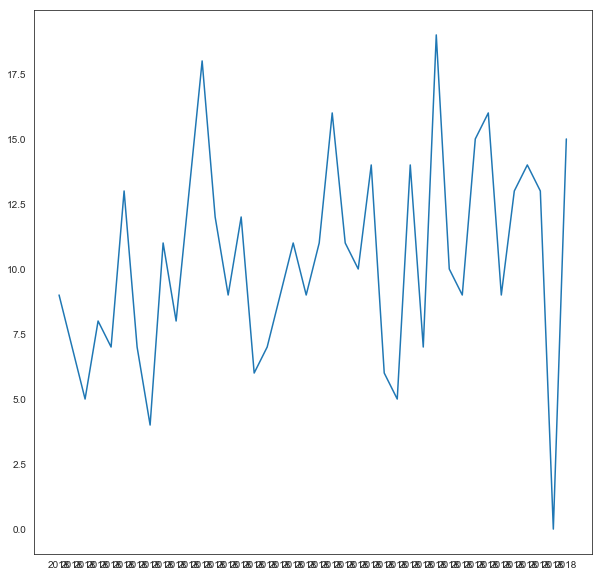

In [42]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=arbor_date_grouped['PatientNumber'].count(), ax=ax)
ax.set_xticks(arbor_date_grouped['PatientNumber'].count().index.strftime('%Y-%m-%d'))

In [45]:
arbor_visits_clean['VisitDateTimeTS'].value_counts(sort=False,bins=10)

(2018-03-04 02:56:43.799999999, 2018-03-31 16:57:00]    29
(2018-03-31 16:57:00, 2018-04-28 00:24:00]              31
(2018-04-28 00:24:00, 2018-05-25 07:51:00]              50
(2018-05-25 07:51:00, 2018-06-21 15:18:00]              39
(2018-06-21 15:18:00, 2018-07-18 22:45:00]              36
(2018-07-18 22:45:00, 2018-08-15 06:12:00]              48
(2018-08-15 06:12:00, 2018-09-11 13:39:00]              39
(2018-09-11 13:39:00, 2018-10-08 21:06:00]              45
(2018-10-08 21:06:00, 2018-11-05 04:33:00]              53
(2018-11-05 04:33:00, 2018-12-02 12:00:00]              42
Name: VisitDateTimeTS, dtype: int64

In [46]:
pfc_visits_clean['VisitDateTimeTS'].value_counts(sort=False,bins=10)

(2018-03-03 02:16:41.999999999, 2018-03-30 16:20:00]    34
(2018-03-30 16:20:00, 2018-04-26 23:50:00]              26
(2018-04-26 23:50:00, 2018-05-24 07:20:00]              30
(2018-05-24 07:20:00, 2018-06-20 14:50:00]              23
(2018-06-20 14:50:00, 2018-07-17 22:20:00]              20
(2018-07-17 22:20:00, 2018-08-14 05:50:00]              26
(2018-08-14 05:50:00, 2018-09-10 13:20:00]              26
(2018-09-10 13:20:00, 2018-10-07 20:50:00]              42
(2018-10-07 20:50:00, 2018-11-04 04:20:00]              27
(2018-11-04 04:20:00, 2018-12-01 11:50:00]              18
Name: VisitDateTimeTS, dtype: int64

In [47]:
grouped = pfc_visits_clean.groupby('VisitType')
for g in grouped.groups:
    print g
    print len(grouped.groups[g])

PFC NEW PATIENT VISIT
272


In [48]:
arbor_visits_clean.groupby('VisitType').size()

VisitType
ARBOR GENERAL VISIT    412
dtype: int64

In [49]:
df_visits = pd.read_csv(path_visits, error_bad_lines=False, header=0)
df_visits['VisitDateTimeTS'] = pd.to_datetime((df_visits['VisitDateTime']))
df_visits['DateFirstKnownTS'] = pd.to_datetime((df_visits['DateFirstKnown']))
df_visits.index = df_visits['VisitDateTimeTS']
#df_visits = df_visits.iloc[::-1]
del df_visits['DateFirstKnown']
del df_visits['VisitDateTime']

df_visits = df_visits[df_visits['LocationAbbreviation'] != 'TEST']
df_visits_clean = df_visits[df_visits['Age(Year)']> 18]
df_visits_clean.sort_values('VisitDateTimeTS', inplace=True)

/Users/alex/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [50]:
df_visits_clean.groupby('VisitType').size()

VisitType
ADMIN CHART REVIEW NOTE      10
ARBOR CARDIOLOGY              4
ARBOR DERMATOLOGY            18
ARBOR FAST TRACK TB           1
ARBOR FAST TRACK VACCINE      2
ARBOR FOLLOW-UP VISIT        16
ARBOR GENERAL VISIT         412
ARBOR MENTAL HEALTH          17
ARBOR MSK                    13
ARBOR NEUROLOGY               5
ARBOR OPHTHALMOLOGY          20
ARBOR WOMEN'S HEALTH          9
BRIDGE TO CARE NOTE           6
HEALTH EDUCATOR NOTE        130
LAB FOLLOW-UP NOTE          224
MISC NOTE                   166
PATIENT NAVIGATOR NOTE       67
PFC DERMATOLOGY VISIT        17
PFC FAST TRACK               21
PFC FAST TRACK VACCINE       11
PFC FOLLOW UP VISIT         259
PFC HEP CLINIC VISIT         18
PFC MENTAL HEALTH VISIT       7
PFC NEW PATIENT VISIT       272
PFC OPHTHALMOLOGY VISIT      34
PFC WOMEN'S CLINIC VISIT     34
PHONE                         5
dtype: int64

In [51]:
ALL_SPEC_KEYS = [
    'ARBOR CARDIOLOGY',
    'ARBOR DERMATOLOGY',
    'ARBOR FOLLOW-UP VISIT',
    'ARBOR GENERAL VISIT',
    'ARBOR MENTAL HEALTH',
    'ARBOR MSK',
    'ARBOR NEUROLOGY',
    'ARBOR OPHTHALMOLOGY',
    "ARBOR WOMEN'S HEALTH",
    'PFC DERMATOLOGY VISIT',
    'PFC FOLLOW UP VISIT',
    'PFC HEP CLINIC VISIT',
    'PFC MENTAL HEALTH VISIT',
    'PFC NEW PATIENT VISIT',
    'PFC OPHTHALMOLOGY VISIT',
    "PFC WOMEN'S CLINIC VISIT",
    'PFC FAST TRACK VACCINE'
]


periodic_visits, spec_usage_mom, time_points = visits_periodic(df_visits_clean, 
                                                               group_keys=ALL_SPEC_KEYS)
print np.sum(periodic_visits)
print spec_usage_mom
print time_points

joint_spec_df = pd.DataFrame({clinic:spec_usage_mom[:,col_idx] 
                                     for clinic, col_idx in zip(ALL_SPEC_KEYS, range(spec_usage_mom.shape[1]))
                                    }, 
                                    index = time_points)

joint_spec_df.head(20)


(2018, 7, 1) (2018, 8, 1)
2018-07-01 00:00:00 2018-08-01 00:00:00
(2018, 8, 1) (2018, 9, 1)
2018-08-01 00:00:00 2018-09-01 00:00:00
(2018, 9, 1) (2018, 10, 1)
2018-09-01 00:00:00 2018-10-01 00:00:00
(2018, 10, 1) (2018, 11, 1)
2018-10-01 00:00:00 2018-11-01 00:00:00
(2018, 11, 1) (2018, 12, 1)
2018-11-01 00:00:00 2018-12-01 00:00:00
(2018, 12, 1) (2019, 1, 1)
2018-12-01 00:00:00 2019-01-01 00:00:00
1057
[[ 0.  5.  0. 56.  0.  3.  1.  0.  1.  0. 36.  0.  0. 17.  9.  6.  4.]
 [ 0.  0.  0. 41.  3.  0.  0.  5.  0.  3. 26.  0.  0. 23.  2.  1.  0.]
 [ 0.  7.  3. 55.  4.  4.  1.  0.  0.  0. 21.  0.  2. 55.  0.  6.  0.]
 [ 0.  0.  0. 49.  1.  0.  0.  5.  0.  5. 27.  6.  0. 28.  5.  6.  4.]
 [ 0.  3.  3. 40.  0.  0.  1.  0.  3.  0. 23.  5.  2. 16.  4.  2.  1.]
 [ 0.  0.  0. 15.  4.  0.  0.  5.  0.  0.  7.  0.  0.  9.  0.  3.  0.]]
['7/2018', '8/2018', '9/2018', '10/2018', '11/2018', '12/2018']


,ARBOR CARDIOLOGY,ARBOR DERMATOLOGY,ARBOR FOLLOW-UP VISIT,ARBOR GENERAL VISIT,ARBOR MENTAL HEALTH,ARBOR MSK,ARBOR NEUROLOGY,ARBOR OPHTHALMOLOGY,ARBOR WOMEN'S HEALTH,PFC DERMATOLOGY VISIT,PFC FAST TRACK VACCINE,PFC FOLLOW UP VISIT,PFC HEP CLINIC VISIT,PFC MENTAL HEALTH VISIT,PFC NEW PATIENT VISIT,PFC OPHTHALMOLOGY VISIT,PFC WOMEN'S CLINIC VISIT
7/2018,0.0,5.0,0.0,56.0,0.0,3.0,1.0,0.0,1.0,0.0,4.0,36.0,0.0,0.0,17.0,9.0,6.0
8/2018,0.0,0.0,0.0,41.0,3.0,0.0,0.0,5.0,0.0,3.0,0.0,26.0,0.0,0.0,23.0,2.0,1.0
9/2018,0.0,7.0,3.0,55.0,4.0,4.0,1.0,0.0,0.0,0.0,0.0,21.0,0.0,2.0,55.0,0.0,6.0
10/2018,0.0,0.0,0.0,49.0,1.0,0.0,0.0,5.0,0.0,5.0,4.0,27.0,6.0,0.0,28.0,5.0,6.0
11/2018,0.0,3.0,3.0,40.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,23.0,5.0,2.0,16.0,4.0,2.0
12/2018,0.0,0.0,0.0,15.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,7.0,0.0,0.0,9.0,0.0,3.0


In [52]:
joint_spec_df.to_csv('joint_spec_clinics_12_17.csv')